In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv('sentiment_analysis_data.csv')

In [8]:
len(df)

5842

In [9]:
X = df['Sentence']
y = df['Sentiment']

print("Number of unique values in y:", len(y.unique()))

Number of unique values in y: 3


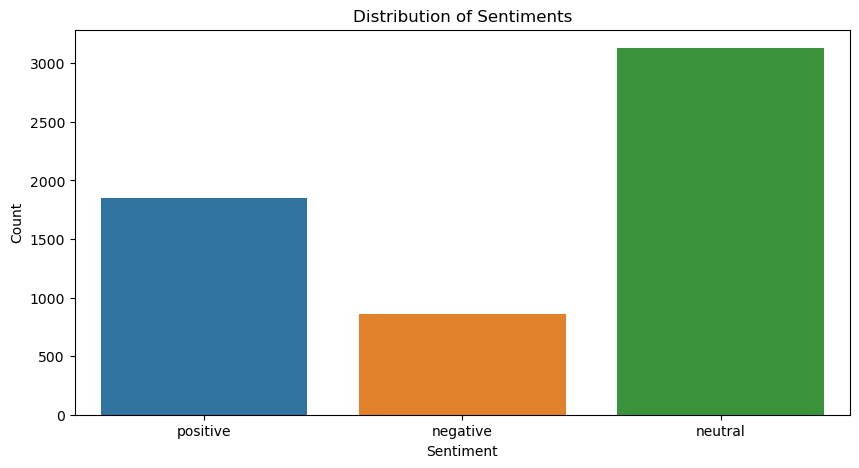

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x=y)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [13]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english') # Use English stop words
X_vectorized = vectorizer.fit_transform(X)

print("Number of features:", len(vectorizer.get_feature_names_out()))

Number of features: 11126


In [16]:
vocabulary = vectorizer.vocabulary_
if 'netflix' in vocabulary:
  print("The word 'netflix' is present at position:", vocabulary['netflix'])
else:
  print("The word 'netflix' is not present in the vocabulary.")

The word 'netflix' is present at position: 6882


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

positive_test_data_count = sum(1 for label in y_test if label == 'positive')
print(f"Number of positive data points in the test data: {positive_test_data_count}")

Number of positive data points in the test data: 472


In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
X_train_vectorized = vectorizer.transform(X_train)
nb_classifier.fit(X_train_vectorized, y_train)

training_accuracy = nb_classifier.score(X_train_vectorized, y_train)
print(f"Training Accuracy: {training_accuracy:.2f}")

Training Accuracy: 0.86


In [28]:
X_test_vectorized = vectorizer.transform(X_test)
test_accuracy = nb_classifier.score(X_test_vectorized, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.69


In [34]:
y_pred = nb_classifier.predict(X_test_vectorized)
incorrect_neutral = np.sum((y_test == 'neutral') & (y_pred != 'neutral'))
print(f"Number of neutral data points incorrectly predicted: {incorrect_neutral}")

Number of neutral data points incorrectly predicted: 166


In [35]:
sentence = ['The compnay XYZ did not perform well in the first quarter. Its sales have been declining.']
sentence_vectorized = vectorizer.transform(sentence)
predicted_sentiment = nb_classifier.predict(sentence_vectorized)[0]
predicted_sentiment

'neutral'

In [37]:
sentence = ['The growth rate of the company has been positive. Its shares price is also increasing. Customers like the companys policies']
sentence_vectorized = vectorizer.transform(sentence)
predicted_sentiment = nb_classifier.predict(sentence_vectorized)[0]
predicted_sentiment

'positive'